Codigo en Python, hecho en google colaboratory, para determinar la calificacion de una pelicula teniendo en cuenta una serie de antecedentes (Guion,  Interpretacion, Efectos, Musica y Direccion).
Se debe obtener un valor entre 1-10

In [18]:
#Installacion de la libreria de logica difusa
!pip install scikit-fuzzy

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Los nuevos objetos Antecedente/Consecuente contienen variables de universo y membresía
# funciones que utilizaremos
Guion          = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Guion')
Interpretacion = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Interpretacion')
Efectos        = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Efectos')
Musica         = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Musica')
Direccion      = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Direccion')
Calificacion   = ctrl.Consequent(np.arange(0, 11, 0.1), 'Calificacion')

# Creacion de las funciones de población para cada uno de los antecedentes y 
# el consecuente

Guion['Mala'] = fuzz.trimf(Guion.universe, [0, 0, 4])
Guion['Normal'] = fuzz.trimf(Guion.universe, [3, 5, 7])
Guion['Genial'] = fuzz.trimf(Guion.universe, [6, 10, 10])

Interpretacion['Mala'] = fuzz.trimf(Interpretacion.universe, [0, 0, 4])
Interpretacion['Normal'] = fuzz.trimf(Interpretacion.universe, [3, 5, 7])
Interpretacion['Genial'] = fuzz.trimf(Interpretacion.universe, [6, 10, 10])

Efectos['Mala'] = fuzz.trimf(Efectos.universe, [0, 0, 4])
Efectos['Normal'] = fuzz.trimf(Efectos.universe, [3, 5, 7])
Efectos['Genial'] = fuzz.trimf(Efectos.universe, [6, 10, 10])

Musica['Mala'] = fuzz.trimf(Musica.universe, [0, 0, 4])
Musica['Normal'] = fuzz.trimf(Musica.universe, [3, 5, 7])
Musica['Genial'] = fuzz.trimf(Musica.universe, [6, 10, 10])

Direccion['Mala'] = fuzz.trimf(Direccion.universe, [0, 0, 4])
Direccion['Normal'] = fuzz.trimf(Direccion.universe, [3, 5, 7])
Direccion['Genial'] = fuzz.trimf(Direccion.universe, [6, 10, 10])


Calificacion['Mala'] = fuzz.trimf(Calificacion.universe, [0, 0, 4])
Calificacion['Normal'] = fuzz.trimf(Calificacion.universe, [3, 5, 7])
Calificacion['Genial'] = fuzz.trimf(Calificacion.universe, [6, 10, 10])

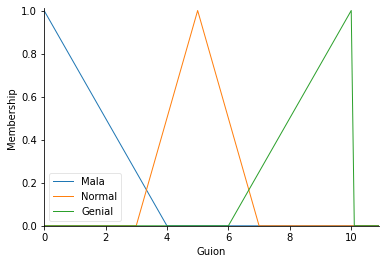

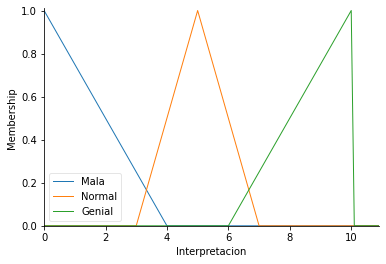

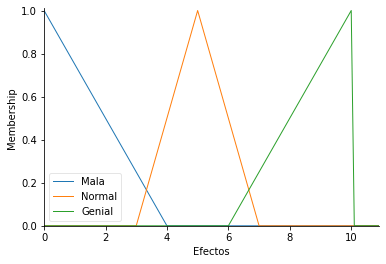

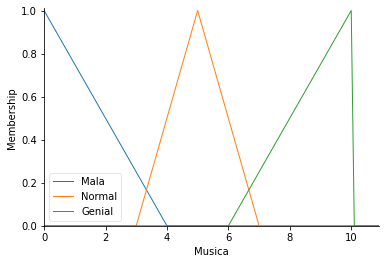

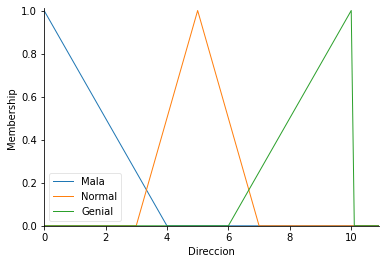

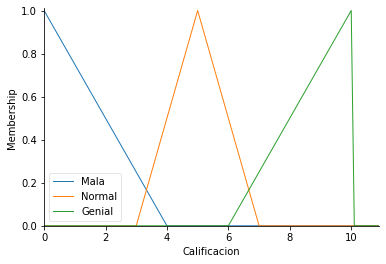

In [21]:
#Vision de las graficas de las funciones de membresia

Guion.view()
Interpretacion.view()
Efectos.view()
Musica.view()
Direccion.view()
Calificacion.view()

In [22]:
#Reglas del sistema, obtenidas a traves de determinar todas las posibilidades
# con un sistema de arbol de desiciones, con una tabla basada en mis elecciones

rule1  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Mala'], Calificacion['Mala'])

rule2  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Normal'] & Musica['Mala'] 
                   & Guion['Mala'], Calificacion['Mala'])
rule3  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Normal'] & ~Musica['Mala'] 
                   & ~Guion['Mala'], Calificacion['Normal'])
rule4  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Genial'] & Guion['Mala'] 
                   & Direccion['Mala'], Calificacion['Mala'])
rule5  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Genial'] & Guion['Mala'] 
                   & Direccion['Normal'] & ~Musica['Genial'], Calificacion['Mala'])
rule6  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Genial'] & Guion['Mala'] 
                   & Direccion['Normal'] & Musica['Genial'], Calificacion['Normal'])
rule7  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Genial'] & Guion['Mala'] 
                   & Direccion['Genial'] & ~Musica['Genial'], Calificacion['Normal'])
rule8  = ctrl.Rule(Interpretacion['Mala'] & Efectos['Genial'] & Guion['Mala'] 
                   & Direccion['Genial'] & Musica['Genial'], Calificacion['Genial'])

rule9  = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Mala'] 
                   & Direccion['Mala'], Calificacion['Mala'])
rule10  = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Mala'] 
                    & ~Direccion['Mala'] & Musica['Mala'], Calificacion['Mala'])
rule11 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Mala'] 
                   & ~Direccion['Mala'] & ~Musica['Mala'], Calificacion['Normal'])
rule12 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Normal'] 
                   & Direccion['Mala'] & ~Musica['Genial'], Calificacion['Mala'])
rule13 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Normal'] 
                   & Direccion['Mala'] & Musica['Genial'], Calificacion['Normal'])
rule14 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Normal'] 
                   & Direccion['Normal'] & Musica['Mala'], Calificacion['Mala'])
rule15 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Normal'] 
                   & Direccion['Normal'] & ~Musica['Mala'], Calificacion['Normal'])
rule16 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Normal']
                   & Direccion['Genial'], Calificacion['Normal'])
rule17 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Mala'] & Guion['Genial'], 
                   Calificacion['Normal'])

rule18 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Normal'] & ~Direccion['Genial'],
                   Calificacion['Normal'])
rule19 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Normal'] & Direccion['Genial']
                   & ~Guion['Genial'] & ~Musica['Genial'], Calificacion['Normal'])
rule20 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Normal'] & Direccion['Genial'] 
                   & ~Guion['Genial'] & Musica['Genial'], Calificacion['Genial'])
rule21 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Normal'] & Direccion['Genial']
                   & Guion['Genial'], Calificacion['Genial'])

rule22 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Mala'],
                   Calificacion['Normal'])
rule23 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Normal']
                   & Guion['Mala'], Calificacion['Normal'])
rule24 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Normal']
                   & Guion['Normal'] & ~Musica['Genial'], Calificacion['Normal'])
rule25 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Normal']
                   & Guion['Normal'] & Musica['Genial'], Calificacion['Genial'])
rule26 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Normal']
                   & Guion['Genial'] & Musica['Mala'], Calificacion['Normal'])
rule27 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Normal']
                   & Guion['Genial'] & ~Musica['Mala'], Calificacion['Genial'])
rule28 = ctrl.Rule(Interpretacion['Normal'] & Efectos['Genial'] & Direccion['Genial'],
                   Calificacion['Genial'])

rule29 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Mala'] 
                   & ~Guion['Genial'], Calificacion['Mala'])
rule30 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Mala'] 
                   & Guion['Genial'], Calificacion['Normal'])                
rule31 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal'] 
                   & Direccion['Mala'] & Guion['Mala'], Calificacion['Mala'])
rule32 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal'] 
                   & Direccion['Mala'] & ~Guion['Mala'], Calificacion['Normal'])
rule33 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal'] 
                   & Direccion['Normal'] & ~Guion['Genial'], Calificacion['Normal'])
rule34 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal'] 
                   & Direccion['Normal'] & Guion['Genial'], Calificacion['Genial'])
rule35 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal']
                   & Direccion['Genial'] & Guion['Mala'], Calificacion['Normal'])
rule36 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Normal']
                   & Direccion['Genial'] & ~Guion['Mala'], Calificacion['Genial'])
rule37 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Genial']
                   & ~Guion['Genial'] & Direccion['Mala'], Calificacion['Normal'])
rule38 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Genial'] 
                   & ~Guion['Genial'] & ~Direccion['Mala'], Calificacion['Genial'])
rule39 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Mala'] & Musica['Genial'] 
                   & Guion['Genial'], Calificacion['Genial'])

rule40 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Normal'] & Direccion['Mala']
                   & ~Guion['Genial'], Calificacion['Normal'])
rule41 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Normal'] & Direccion['Mala'] 
                   & Guion['Genial'], Calificacion['Genial'])
rule42 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Normal'] & Direccion['Mala'] 
                   & Guion['Mala'], Calificacion['Normal'])
rule43 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Normal'] & Direccion['Mala'] 
                   & ~Guion['Mala'], Calificacion['Genial'])
rule44 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Normal'] & Direccion['Genial'], 
                   Calificacion['Genial'])

rule45 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Genial'] & Direccion['Mala'] 
                   & Musica['Mala'] & ~Guion['Genial'], Calificacion['Normal'])
rule46 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Genial'] & Direccion['Mala'] 
                   & Musica['Mala'] & Guion['Genial'], Calificacion['Genial'])
rule47 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Genial'] & Direccion['Mala']
                   & ~Musica['Mala'], Calificacion['Genial'])
rule48 = ctrl.Rule(Interpretacion['Genial'] & Efectos['Genial'] & ~Direccion['Mala'],
                   Calificacion['Genial'])


In [23]:
peli_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,
                                rule9,rule10,rule11,rule12,rule13,rule14,rule15,
                                rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                rule23,rule24,rule25,rule26,rule27,rule28,rule29,
                                rule30,rule31,rule32,rule33,rule34,rule35,rule36,
                                rule37,rule38,rule39,rule40,rule41,rule42,rule43,
                                rule44,rule45,rule46,rule47,rule48])
peli = ctrl.ControlSystemSimulation(peli_ctrl)

8.483333333333333


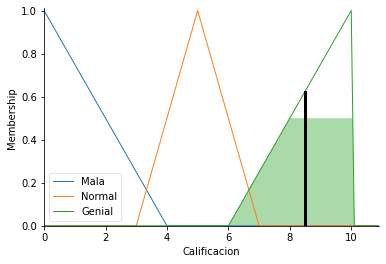

In [24]:
# Introducimos las entradas al sistema de control utilizando etiquetas de 
# antecedentes con la API de Pythonic

peli.input['Guion'] = 8
peli.input['Interpretacion'] = 8
peli.input['Direccion'] = 10
peli.input['Efectos'] = 8
peli.input['Musica'] = 7

peli.compute()

print (peli.output['Calificacion'])
Calificacion.view(sim=peli)